# Introduction

Cancer is a disease characterized by the transformation of a healthy normal cell into an abnormal tumor cells which proliferate uncontrollably. The disease has the potential to cause various mobidities in a patient, which can eventually lead to their death. Tumors are often designated as liquid tumors (blood or lymph based) or solid tumors, and are further subtyped based on the indication (tissue or organ) from which the cancerous cell originated from. Thus, the specific treatment largely depends on the indication. Advances in cancer treatments range in efficacy from completely eliminating some tumor types while having little effect on others. Characterizing the profile of specific tumor indications should enable better research and development into therapies which can have greater potentcy against the tumor. 

The raw data here specifically assesses protein levels across 2 distinct datasets; one from various patient primary biopsy samples initially processed and uploaded to The Cancer Genome Atlas and the other from cancer cell lines. Proteins themselves are the machinery of the cell, and variations in the amounts or "expression" of the protein in comparison to other tumor types may give us clues into the tumor's profile and how to possibly treat it. The data contained here was initially assessed by Reverse Phase Protein Array (RPPA), which is an antibody based array to assess proteomic expression levels for each sample. This data was then further formatted into an L4 format which acted to normalize expression acrossed the samples in each dataset by the MD Cancer Center to provide a database for researchers and scientists to access and further analyze.  Values represent ratios which equates to the difference in fold change expression of the protein normalized across the data set. 

The purpose of analyzing this dataset will be to identify and profile tumors subsets within the overall cancer types to aid in the development of therapies against that tumor. 


# Requirements 

### Datasets:
CCLE Primary Human Tumor samples: https://www.tcpaportal.org/tcpa/download.html -> Downloads -> 4.2 -> TCGA -> Pan-Can32 -> Level 4

CCLE Cell Line samples: https://sites.broadinstitute.org/ccle/datasets -> CCLE Data(https://depmap.org/portal/download/all/) -> Dataset View = CCLE 2019 -> CCLE_RPA_20181003.csv also Cell_lines_annotations_20181226.txt

MDACC Cell Line samples: https://tcpaportal.org/mclp/#/  -> Downloads -> MCLP v1.1

#### Conversion Code for MCLP (tsv -> csv)
import pandas as pd

tsv_file = "MCLP-v1.1-Level4.tsv"
csv_file = "MCLP-v1.1-Level4.csv"

df = pd.read_csv(tsv_file, sep="\t")
df.to_csv(csv_file, index=False)

### Python:
Python3 (3.9.7)

### Modules:
Pandas (1.3.4)

Numpy (1.20.3)

Matplotlib (3.4.3)

Seaborn (0.11.2)

# To Do List


#### 3) Clean up data
Add a column for the CCLE and the MD Anderson data for the particular disease type
Protein Column names need to be uniformly changed this is likely easier on excel so we can compare names and easily change them if need be
Try to match the MD anderson cell type disease to the CCLE nomenclature
May need to generate secondary designation to change the indication into abreviated?
#### 1) Derive questions to ask

#### 4) Generate Potential Figures?
#### 5) Figure out potential uses of the data in prediction ML or DL
  

#### a) What Can I do with the data
Can I look at Compare both breast cancer and Triple negative breast cancer expression in the cell line? (Yes)

Figure out which 3 indications have similar protein expression compared with brca in both data sets

Exercise bonus: use the Cell line data to classify what each patients tumor set could potentially be.
See if i can predict which patients have breast cancer and then also which patients could have triple negative based on protein expression

# Key Acronyms: 
ACC (Adrenocortical Carcinoma) 
BLCA (Bladder Urothelial Carcinoma)
BRCA (Breast Invasive Carcinoma)
CESC (Cervical Squamous Cell Carcinoma and Endocervical Adenocarcinoma)
CHOL (Cholangiocarcinoma)
COAD (Colon adenocarcinoma)
DLBC (Lymphoid Neoplasm Diffuse Large B-cell Lymphoma)
ESCA (Esophageal Carcinoma)
GBM (Glioblastoma Carcinoma)
HNSC (Head and Neck Squamous Cell Carcinoma)
KICH (Kidney Chromophobe)
KIRC (Kidney Renal Clear Cell Carcinoma) 
KIRP (Kidney Renal Papillary Cell Carcinoma)
LGG (Brain Lower Grade Glioma)
LIHC (Liver Hepatocellular Carcinoma)
LUAD (Lung Adenocarcinoma)
LUSC (Lung Squamous Cell Carcinoma)
MESO (Mesothelioma)
OV (Ovarian Serous Cystadenocarcinoma)
PAAD (Pancreatic Adenocarcinoma) 
PCPG (Pheochromocytoma and Paranganglioma)
PRAD (Prostate Adenocarcinoma)
READ (Rectum Adenocarcinoma)
SARC (Sarcoma)
SKCM (Skin Cutaneous Melanoma)
STAD (Stomach Adenocarcinoma)
TGCT (Testiticular Germ Cell Tumors)
THCA (Thyroid Carcinoma)
THYM (Thymoma)
UCEC (Uterine Corpus Endometrial Carcinoma) 
UCS (Uterine Carcinosarcoma) 
UVM (Uveal Melanoma)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reformatting Data

Data needs to be reformatted into a Pandas dataframe for further organization. 
Once the data is read, the data will be briefly checked for proper upload and formated into the dataframe. The number of entries (rows and columns) will be identified. 

In [3]:
primary = pd.read_csv('TCGA-PANCAN32-L4.csv') #comma separated value file, default separation 
MDCC = pd.read_csv('MCLP-v1.1-Level4.csv') #comma separated value file, default separation
CCLE = pd.read_csv('CCLE_RPPA_20181003.csv') #comma separated value file, default separation

In [5]:
print (primary.head()) 
print ("Number of rows and columns:", primary.shape) 
uniqueC = primary['Cancer_Type']
print ("Number of Cancer Types in dataset:", uniqueC.nunique())

                     Sample_ID Cancer_Type Sample_Type  X1433EPSILON   X4EBP1  \
0  TCGA-AO-A1KP-01A-21-A17I-20        BRCA     Primary       0.11304  0.00350   
1  TCGA-FG-8191-01A-11-A29Z-20         LGG     Primary       0.19884 -0.73442   
2  TCGA-34-5232-01A-22-2194-20        LUSC     Primary      -0.21886  0.44996   
3  TCGA-EV-5903-01A-21-A39O-20        KIRP     Primary       0.21520 -0.33630   
4  TCGA-49-4514-01A-22-2190-20        LUAD     Primary       0.08883  0.74123   

   X4EBP1_pS65  X4EBP1_pT37T46   X53BP1  ACC_pS79     ACC1  ...  PARPAB3  \
0    -0.150460         0.26271 -0.68908  -0.97899 -1.23550  ...      NaN   
1    -0.193490        -0.38683 -0.80777  -0.70958 -0.78887  ...      NaN   
2     0.005231         0.38994 -0.88473  -0.22324 -0.32914  ...  0.45607   
3    -0.263290        -0.82751 -1.04460   0.53671  0.56257  ...      NaN   
4     0.263190         1.29900 -1.69780  -0.63225 -1.01400  ...  0.70409   

   THYMIDILATESYNTHASE    TTF1  CHROMOGRANINANTERM      

The data transformation yielded 7691 sample with 261 columns of data entries. Further clean up of the dataframe will be to eliminate columns with data missing. In addition, the sample_type column will also be deleted since all samples are from primary tumor biopsy samples.  


In [4]:
print (df.columns)
df1 = df.drop("Sample_Type", axis = 1) #axis 1 is columns
df1.head()


Index(['Sample_ID', 'Cancer_Type', 'Sample_Type', 'X1433EPSILON', 'X4EBP1',
       'X4EBP1_pS65', 'X4EBP1_pT37T46', 'X53BP1', 'ACC_pS79', 'ACC1',
       ...
       'PARPAB3', 'THYMIDILATESYNTHASE', 'TTF1', 'CHROMOGRANINANTERM', 'CK5',
       'NAPSINA', 'P63', 'RET_pY905', 'SYNAPTOPHYSIN', 'ALPHACATENIN'],
      dtype='object', length=261)


,Sample_ID,Cancer_Type,X1433EPSILON,X4EBP1,X4EBP1_pS65,X4EBP1_pT37T46,X53BP1,ACC_pS79,ACC1,AKT,...,PARPAB3,THYMIDILATESYNTHASE,TTF1,CHROMOGRANINANTERM,CK5,NAPSINA,P63,RET_pY905,SYNAPTOPHYSIN,ALPHACATENIN
0,TCGA-AO-A1KP-01A-21-A17I-20,BRCA,0.11304,0.00350,-0.150460,0.26271,-0.68908,-0.97899,-1.23550,-0.20325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-FG-8191-01A-11-A29Z-20,LGG,0.19884,-0.73442,-0.193490,-0.38683,-0.80777,-0.70958,-0.78887,-0.39280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.62423
2,TCGA-34-5232-01A-22-2194-20,LUSC,-0.21886,0.44996,0.005231,0.38994,-0.88473,-0.22324,-0.32914,-0.13774,...,0.45607,0.003855,1.0009,0.35940,0.021303,-0.20533,0.84349,-0.17617,0.16572,NaN
3,TCGA-EV-5903-01A-21-A39O-20,KIRP,0.21520,-0.33630,-0.263290,-0.82751,-1.04460,0.53671,0.56257,-0.55419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-49-4514-01A-22-2190-20,LUAD,0.08883,0.74123,0.263190,1.29900,-1.69780,-0.63225,-1.01400,-1.09060,...,0.70409,0.394790,1.9965,0.15326,-0.236860,0.27223,0.22516,-0.31620,-0.15950,NaN


In [5]:
print(df1.isnull().sum())
df2 = df1.copy(deep = True)
print (df2.shape)
print ("+++++++++++++++++++++++++++++++++")
df2 = df2.dropna(axis = 1) #dropped the NA sets along column
print (df2.isnull().sum())
print (df2.shape)
df2.head()

Sample_ID           0
Cancer_Type         0
X1433EPSILON        0
X4EBP1              0
X4EBP1_pS65         0
                 ... 
NAPSINA          7065
P63              7065
RET_pY905        7065
SYNAPTOPHYSIN    7065
ALPHACATENIN     6824
Length: 260, dtype: int64
(7694, 260)
+++++++++++++++++++++++++++++++++
Sample_ID       0
Cancer_Type     0
X1433EPSILON    0
X4EBP1          0
X4EBP1_pS65     0
               ..
IRF1            0
JAK2            0
P16INK4A        0
SHP2_pY542      0
PDL1            0
Length: 212, dtype: int64
(7694, 212)


,Sample_ID,Cancer_Type,X1433EPSILON,X4EBP1,X4EBP1_pS65,X4EBP1_pT37T46,X53BP1,ACC_pS79,ACC1,AKT,...,CHK1_pS296,COG3,DUSP4,ERCC5,IGF1R_pY1135Y1136,IRF1,JAK2,P16INK4A,SHP2_pY542,PDL1
0,TCGA-AO-A1KP-01A-21-A17I-20,BRCA,0.11304,0.00350,-0.150460,0.26271,-0.68908,-0.97899,-1.23550,-0.20325,...,0.31028,-0.81535,-0.547990,-0.497970,0.53676,-0.061221,-0.207880,-0.175430,-0.26669,-0.25852
1,TCGA-FG-8191-01A-11-A29Z-20,LGG,0.19884,-0.73442,-0.193490,-0.38683,-0.80777,-0.70958,-0.78887,-0.39280,...,-0.32124,-0.33496,-0.390090,-0.542160,0.31428,-0.191560,0.220610,1.310700,0.86186,0.84053
2,TCGA-34-5232-01A-22-2194-20,LUSC,-0.21886,0.44996,0.005231,0.38994,-0.88473,-0.22324,-0.32914,-0.13774,...,0.14294,-0.39248,-0.307980,-0.068643,0.12869,-0.192940,-0.066964,0.205080,0.25155,0.22487
3,TCGA-EV-5903-01A-21-A39O-20,KIRP,0.21520,-0.33630,-0.263290,-0.82751,-1.04460,0.53671,0.56257,-0.55419,...,0.18308,-0.13203,-0.059514,0.608570,0.45130,0.139870,-0.328710,-0.082936,0.16940,0.30360
4,TCGA-49-4514-01A-22-2190-20,LUAD,0.08883,0.74123,0.263190,1.29900,-1.69780,-0.63225,-1.01400,-1.09060,...,0.15211,-0.56237,0.010372,-0.392700,0.43292,-0.105060,-0.317980,-0.091338,-0.35189,-0.32385


# Analyzing Data - 3 Cancer Types
The data has now been cleaned up and can be analyzed across patient samples. For this analysis, I will specifically be focusing on the cancer types of BRCA (breast invasive carcinoma), PRAD (prostate adenocarinoma), and PAAD (pancreatic adenocarinoma) because their is a large unmet clinical therapeutic need for these cancers.

The first set of data will seek to look at expression of the protein PDL1 which acts to inhibit the activity of immune cells. Immune cells play a big role in eliminating abhorrent and mutated cells. However, tumor cells can evade this surveillance through the expression of proteins on their surface which can block the activity of the immune cells.

I will first look at the overall expression of PDL1 across all cancer types then look at the specific indications of BRCA, PRAD, PAAD.

In [6]:
df3 = df2[['Sample_ID', 'Cancer_Type', 'PDL1']].copy(deep=True)
df3.columns = ['Sample ID', 'Cancer Type', 'PDL1']
print (df3.shape)
print (df3.head())
print (df3.describe()) 
print ('+++++++++++++++++++++++++++++++++++++')
print (df3.groupby('Cancer Type').mean())

(7694, 3)
                     Sample ID Cancer Type     PDL1
0  TCGA-AO-A1KP-01A-21-A17I-20        BRCA -0.25852
1  TCGA-FG-8191-01A-11-A29Z-20         LGG  0.84053
2  TCGA-34-5232-01A-22-2194-20        LUSC  0.22487
3  TCGA-EV-5903-01A-21-A39O-20        KIRP  0.30360
4  TCGA-49-4514-01A-22-2190-20        LUAD -0.32385
              PDL1
count  7694.000000
mean      0.178712
std       0.427720
min      -0.988710
25%      -0.108105
50%       0.136525
75%       0.402348
max       3.647200
+++++++++++++++++++++++++++++++++++++
                 PDL1
Cancer Type          
ACC          0.467447
BLCA         0.277850
BRCA         0.108691
CESC         0.672660
CHOL         0.312945
COAD         0.010141
DLBC         0.976236
ESCA         0.471440
GBM          0.512750
HNSC         0.384451
KICH         0.540075
KIRC        -0.124076
KIRP         0.390928
LGG          0.344507
LIHC         0.472901
LUAD         0.152169
LUSC         0.230641
MESO         0.426207
OV          -0.061498
PAAD   

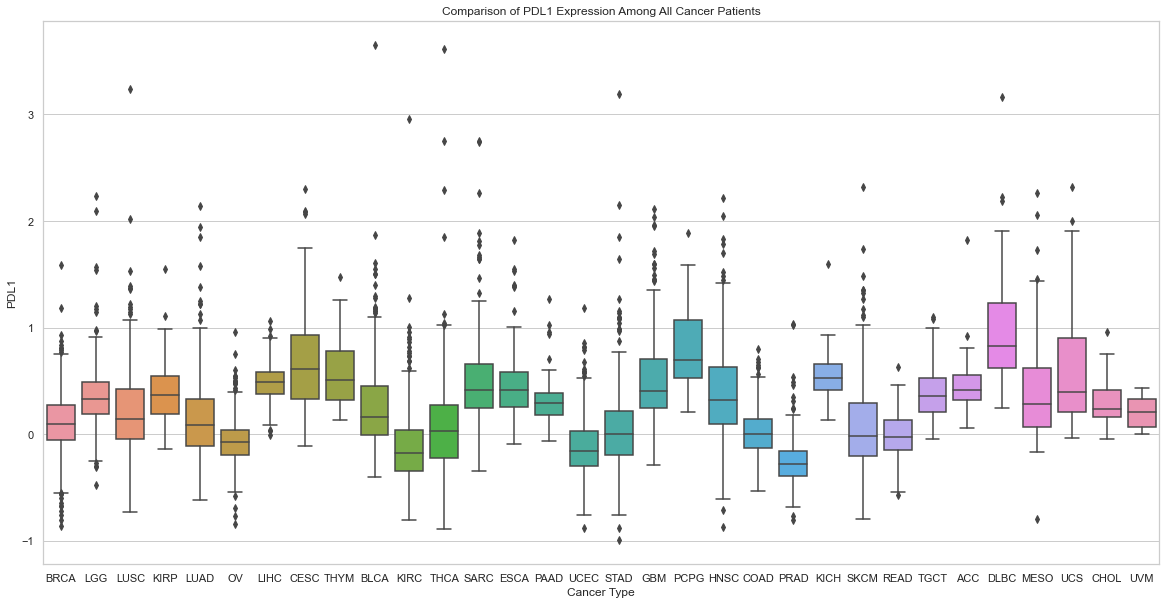

In [7]:
sns.set(rc={'figure.figsize':(20,10)}) #sets the size of the plot
sns.set_style('whitegrid')
sns.boxplot(x ='Cancer Type', y ='PDL1', data = df3) #sets up the boxplot data to be shown
plt.title('Comparison of PDL1 Expression Among All Cancer Patients')
plt.show()

We can make a few observations among the data set generated from the patient biopsy samples when focusing on our three specific indications. Firstly, prostate samples (PRAD) has the lowest overall mean PDL1 expression at -0.256484. Breast cancers (BRCA) has a higher baseline but may not be different from the mean expression among all cancer types, calculated to be around 0.178712. Meanwhile, pancreatic samples (PAAD) has a higher average expression than the other two types at 0.309307.

A greater appreciation for the differences can be seen from the box plot by which we can see the three indications compared to the rest of the primary tumor sample indication sets.


In [8]:
#looking at potential expression profiles of each indication
dfBRCA = df3.loc[df3['Cancer Type'] == 'BRCA'] #locates the specific condition in a column then places the whole row into a new df
print ('BRCA shape:', dfBRCA.shape)
print ('BRCA PDL1 Min and Max:', dfBRCA['PDL1'].min(), dfBRCA['PDL1'].max())
dfPRAD = df3.loc[df3['Cancer Type'] == 'PRAD']
print ('PRAD shape:', dfPRAD.shape)
print ('PRAD PDL1 Min and Max:', dfPRAD['PDL1'].min(), dfPRAD['PDL1'].max())
dfPAAD = df3.loc[df3['Cancer Type'] == 'PAAD']
print ('PAAD shape:', dfPAAD.shape)
print ('PAAD PDL1 Min and Max:', dfPAAD['PDL1'].min(), dfPAAD['PDL1'].max())


BRCA shape: (874, 3)
BRCA PDL1 Min and Max: -0.85762 1.5843
PRAD shape: (351, 3)
PRAD PDL1 Min and Max: -0.80822 1.0328
PAAD shape: (105, 3)
PAAD PDL1 Min and Max: -0.064194 1.2669


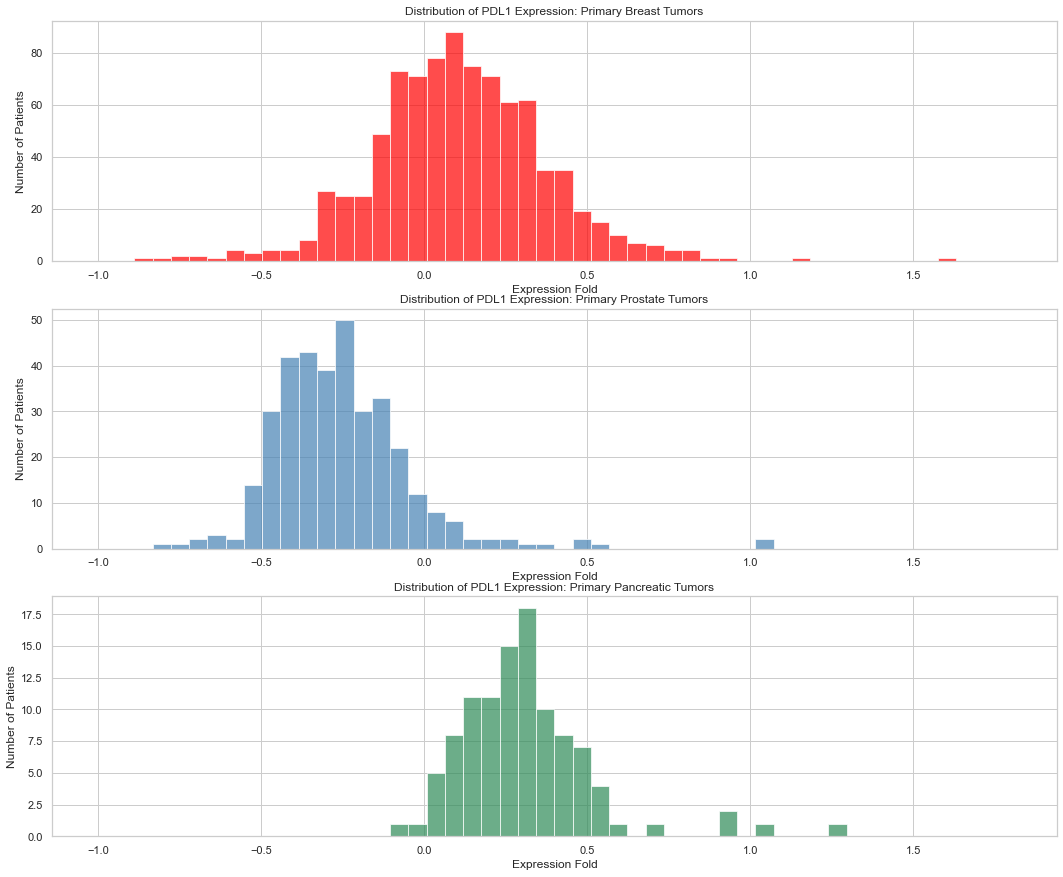

In [9]:
plt.figure(2, figsize=(18, 15))
plt.subplot(311)
plt.hist(dfBRCA['PDL1'], bins = 50, density = 0, range = [-1, 1.8], facecolor = "red", alpha = .7) #bins decide the distribution
plt.xlabel("Expression Fold")
plt.ylabel("Number of Patients")
plt.title("Distribution of PDL1 Expression: Primary Breast Tumors")

plt.subplot(312)
plt.hist(dfPRAD['PDL1'], bins = 50, density = 0, range = [-1, 1.8], facecolor = "steelblue", alpha = .7) #bins decide the distribution
plt.xlabel("Expression Fold")
plt.ylabel("Number of Patients")
plt.title("Distribution of PDL1 Expression: Primary Prostate Tumors")

plt.subplot(313)
plt.hist(dfPAAD['PDL1'], bins = 50, density = 0, range = [-1, 1.8], facecolor = "seagreen", alpha = .7) #bins decide the distribution
plt.xlabel("Expression Fold")
plt.ylabel("Number of Patients")
plt.title("Distribution of PDL1 Expression: Primary Pancreatic Tumors")

plt.show()




Generating a histogram for the 3 cancer types now allows visualization for the distribution of the expression for PDL1. I've set the range and binning for the histogram to be equal across the 3 types to make comparisons in their overall distribution and expression level. Like the boxplot above, the expression of PDL1 in breast tumor samples is around average. Pancreatic tumors have a higher PDL1 expression compared to the other 2 cancer types, while prostate tumors show the lowest average expression. 

Additionally, the distribution of the data for all 3 tumor types generally follows a normal or Gaussian distribution pattern. Unlike the boxplot above, the histogram data should allow us to visualize distinct subsets within the cancer type based on the peaks of the data. However, there does not seem to be a clear delineation of a high expressor only set and low expressor set, which should show up on the histograms as a more bimodal distribution (2 peaks). 

Further analysis of the data could give us clearer insight into mechanisms of the overall biology at play with PDL1. But based on the data alone, prancreatic cancers would be the indication type that would warrant therapy development strategies specifically target and ablate the function of PDL1. However, it is clear from the earlier boxplot figure above that other cancer types could benefit much more from a PDL1 targeted therapy.  

# Analyzing Data - Triple Negative Breast Cancers
The report will now focus on breast cancer as a way to take a a defined tumor profile and use it to identify patients samples within this particular datset. One particularly difficult breast cancer type to treat is known as triple negative breast cancer. This breast cancer is marked by a non-existant or very low expression of the proteins HER2, estrogen receptor (ER-alpha), and progesterone receptor (PR). The breast cancer data will be separated from the other datasets and analyzed specifically for the relative expression of these 3 proteins.   

In [10]:
df4 = df2.loc[df2['Cancer_Type'] == 'BRCA'] #locates the specific condition in a column then places the whole row into a
df4 = df4[['Sample_ID', 'Cancer_Type', 'ERALPHA', 'HER2', 'PR', 'PDL1']].copy(deep=True).reset_index()
df4 = df4.drop("index", axis = 1) #axis 1 is columns
df4.columns = ['Sample ID', 'Cancer Type', 'ER', 'HER2', 'PR', 'PDL1']
print (df4.shape)
print(df4.isnull().sum())
df4.head()


(874, 6)
Sample ID      0
Cancer Type    0
ER             0
HER2           0
PR             0
PDL1           0
dtype: int64


,Sample ID,Cancer Type,ER,HER2,PR,PDL1
0,TCGA-AO-A1KP-01A-21-A17I-20,BRCA,1.55480,0.40935,0.238050,-0.25852
1,TCGA-AN-A0FX-01A-21-A13C-20,BRCA,-0.74531,-0.66004,0.099108,0.25817
2,TCGA-AO-A12D-01A-21-A13E-20,BRCA,-1.22210,3.40840,-0.010415,0.41933
3,TCGA-E9-A22A-01A-21-A17K-20,BRCA,1.43820,-0.18528,-0.027678,0.24815
4,TCGA-E9-A22D-01A-21-A17K-20,BRCA,2.29960,2.44900,0.017223,0.12440


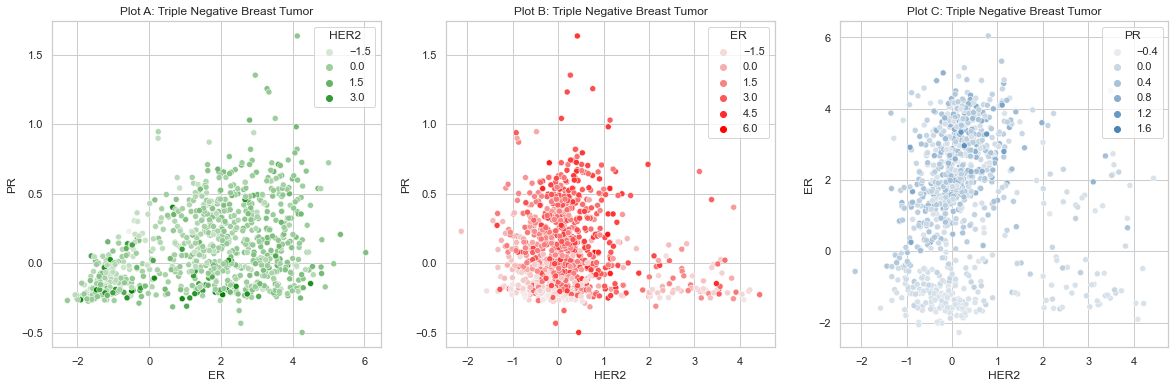

,ER,HER2,PR,PDL1
count,874.000000,874.000000,874.000000,874.000000
mean,1.491615,0.266896,0.097268,0.108691
std,1.842259,0.997090,0.290266,0.261921
min,-2.278400,-2.132300,-0.499090,-0.857620
25%,-0.230775,-0.329135,-0.156860,-0.055792
50%,1.792100,0.081695,0.026265,0.099328
75%,2.934800,0.530260,0.296227,0.272512
max,6.040700,4.434200,1.635800,1.584300


In [11]:
sns.set(rc={'figure.figsize':(20, 6)}) #sets the size of the plot
sns.set_style('whitegrid') #sets the background of the grid can use "darkgrid, whitegrid, dark, white, or ticks"

plt.subplot(131)
sns.scatterplot(data = df4, x = "ER", y = 'PR', hue='HER2', legend = True, palette = sns.light_palette("green", as_cmap=True))
plt.title('Plot A: Triple Negative Breast Tumor') #utilizes matplotlib to add title

plt.subplot(132)
sns.scatterplot(data = df4, x = "HER2", y = 'PR', hue='ER', legend = True, palette = sns.light_palette("red", as_cmap=True))
plt.title('Plot B: Triple Negative Breast Tumor') #utilizes matplotlib to add title

plt.subplot(133)
sns.scatterplot(data = df4, x = "HER2", y = 'ER', hue='PR', legend = True, palette = sns.light_palette("steelblue", as_cmap=True))
plt.title('Plot C: Triple Negative Breast Tumor') #utilizes matplotlib to add title
plt.show()

df4.describe()

Graphical represetation of the dataset yielded mixed results depending on how the the plot was generated. To me, plot B had the greatest difficulty in discerning the triple negative patients. Plot A was better at defining this population, clearly separating the patients that had low PR and ER expression but not HER2 expression based on hue color. Plot C was the most distinct, effectively stratifying the triple negative population.

Using plot C I decided to define the parameters for the triple negative population as PR < 0, ER < 0, and HER2 < 1. For each patient I will designate if they are triple negative subtype and run further analysis on expression of other proteins. In the below example, I've decided to look at PDL1 expression, since it was previously looked at in this report. 

In [12]:
#Option 1 Pulling specific row entries given threshold values

print ('Original BRCA dataframe shape:', df4.shape)
df5 = df4[(df4['PR'] <= 0) & (df4['ER'] <= 0) & (df4['HER2'] <= 1)] #(bitwise) & is intersection check python ref pocketbook
df5['Cancer Type'] = df5['Cancer Type'].replace('BRCA', 'Triple Negative BRCA', regex=True)
print ('Triple negative BRCA dataframe shape:', df5.shape)
print (df5.head())

df6 = df4[(df4['PR'] > 0) | (df4['ER'] > 0) | (df4['HER2'] > 1)] #(bitwise) | is union as long as one condition is satisfied
df6['Cancer Type'] = df6['Cancer Type'].replace('BRCA', 'Unidentified BRCA', regex=True)
print ('Other BRCA dataframe shape:', df6.shape)
print(df6.head())



Original BRCA dataframe shape: (874, 6)
Triple negative BRCA dataframe shape: (152, 6)
                      Sample ID           Cancer Type       ER      HER2  \
12  TCGA-JL-A3YW-01A-21-A24B-20  Triple Negative BRCA -1.45260  0.182530   
16  TCGA-E9-A248-01A-21-A17K-20  Triple Negative BRCA -0.28219  0.584090   
34  TCGA-D8-A1JL-01A-21-A17J-20  Triple Negative BRCA -0.68224 -0.279430   
45  TCGA-E9-A1N8-01A-21-A17K-20  Triple Negative BRCA -2.01870 -0.307220   
49  TCGA-D8-A1XQ-01A-21-A17K-20  Triple Negative BRCA -1.17320  0.008954   

         PR     PDL1  
12 -0.15004  0.51718  
16 -0.28802  0.16061  
34 -0.10077  0.39403  
45 -0.25319  0.20834  
49 -0.11686  0.28564  
Other BRCA dataframe shape: (722, 6)
                     Sample ID        Cancer Type       ER     HER2        PR  \
0  TCGA-AO-A1KP-01A-21-A17I-20  Unidentified BRCA  1.55480  0.40935  0.238050   
1  TCGA-AN-A0FX-01A-21-A13C-20  Unidentified BRCA -0.74531 -0.66004  0.099108   
2  TCGA-AO-A12D-01A-21-A13E-20  Uniden

C:\Users\Albert\AppData\Local\Temp/ipykernel_10780/3529149330.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Cancer Type'] = df5['Cancer Type'].replace('BRCA', 'Triple Negative BRCA', regex=True)
C:\Users\Albert\AppData\Local\Temp/ipykernel_10780/3529149330.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Cancer Type'] = df6['Cancer Type'].replace('BRCA', 'Unidentified BRCA', regex=True)


In [13]:
#Option2 Pulling specific row entries given threshold values
print ('Original BRCA dataframe shape:', df4.shape)
df5 = df4[(df4['PR'] <= 0) & (df4['ER'] <= 0) & (df4['HER2'] <= 1)].copy(deep=True) #(bitwise) & is intersection check python ref pocketbook
df5['Subtype'] = np.nan
df5.fillna(value = 'Triple Negative', inplace=True)
print ('Triple negative BRCA dataframe shape:', df5.shape)
print (df5.head())

df6 = df4[(df4['PR'] > 0) | (df4['ER'] > 0) | (df4['HER2'] > 1)].copy(deep=True) #(bitwise) | is union as long as one condition is satisfied
df6['Subtype'] = np.nan
df6.fillna(value = 'Undefined', inplace=True)
print ('Undefined BRCA dataframe shape:', df6.shape)
print(df6.head())

Original BRCA dataframe shape: (874, 6)
Triple negative BRCA dataframe shape: (152, 7)
                      Sample ID Cancer Type       ER      HER2       PR  \
12  TCGA-JL-A3YW-01A-21-A24B-20        BRCA -1.45260  0.182530 -0.15004   
16  TCGA-E9-A248-01A-21-A17K-20        BRCA -0.28219  0.584090 -0.28802   
34  TCGA-D8-A1JL-01A-21-A17J-20        BRCA -0.68224 -0.279430 -0.10077   
45  TCGA-E9-A1N8-01A-21-A17K-20        BRCA -2.01870 -0.307220 -0.25319   
49  TCGA-D8-A1XQ-01A-21-A17K-20        BRCA -1.17320  0.008954 -0.11686   

       PDL1          Subtype  
12  0.51718  Triple Negative  
16  0.16061  Triple Negative  
34  0.39403  Triple Negative  
45  0.20834  Triple Negative  
49  0.28564  Triple Negative  
Undefined BRCA dataframe shape: (722, 7)
                     Sample ID Cancer Type       ER     HER2        PR  \
0  TCGA-AO-A1KP-01A-21-A17I-20        BRCA  1.55480  0.40935  0.238050   
1  TCGA-AN-A0FX-01A-21-A13C-20        BRCA -0.74531 -0.66004  0.099108   
2  TCGA-AO-A1

(874, 7)
                      Sample ID Cancer Type       ER      HER2        PR  \
0   TCGA-AO-A1KP-01A-21-A17I-20        BRCA  1.55480  0.409350  0.238050   
1   TCGA-AN-A0FX-01A-21-A13C-20        BRCA -0.74531 -0.660040  0.099108   
2   TCGA-AO-A12D-01A-21-A13E-20        BRCA -1.22210  3.408400 -0.010415   
3   TCGA-E9-A22A-01A-21-A17K-20        BRCA  1.43820 -0.185280 -0.027678   
4   TCGA-E9-A22D-01A-21-A17K-20        BRCA  2.29960  2.449000  0.017223   
5   TCGA-A2-A25B-01A-21-A17I-20        BRCA  1.57110  0.360860  0.254650   
6   TCGA-GM-A2DO-01A-21-A24A-20        BRCA  2.18750 -0.420380  0.011729   
7   TCGA-D8-A27P-01A-21-A17L-20        BRCA  1.51000  1.140500  0.049758   
8   TCGA-E9-A5FL-01A-21-A321-20        BRCA -0.75257 -1.030700  0.021897   
9   TCGA-E2-A109-01A-21-A13D-20        BRCA  3.92070  0.644460 -0.113150   
10  TCGA-EW-A1OX-01A-21-A17J-20        BRCA  2.44490  0.765180 -0.022874   
11  TCGA-AR-A2LQ-01A-11-A24A-20        BRCA  0.71761 -0.559630  0.301940   
12 

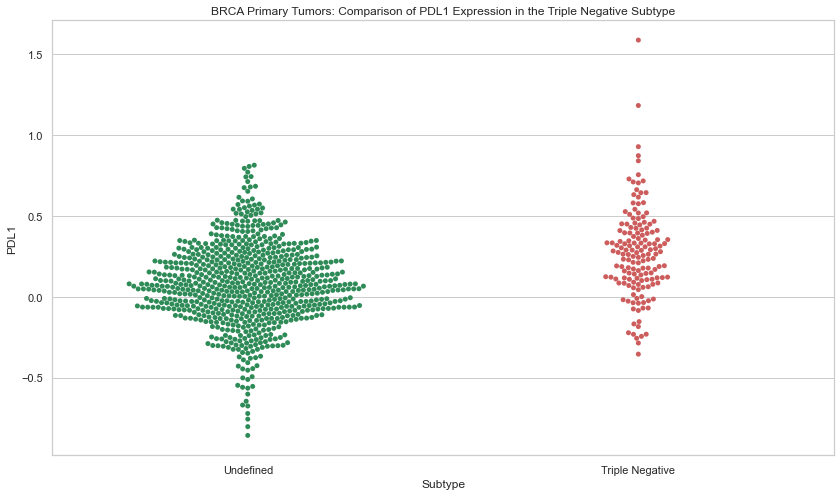

                       ER      HER2        PR      PDL1
Subtype                                                
Triple Negative -1.199102 -0.265530 -0.166911  0.268358
Undefined        2.058082  0.378986  0.152885  0.075077


In [14]:
#Merging the data frame
df7 = df5.append(df6, sort=False).sort_index() #appends and resorts based on the index
print (df7.shape)
print (df7.head(20))
#Plotting in Seaborn
sns.set(rc={'figure.figsize':(14, 8)}) #sets the size of the plot
sns.set_style('whitegrid')
sns.swarmplot(x ='Subtype', y ='PDL1', palette = ['seagreen', 'indianred'], data = df7) #sets up the boxplot data to be shown
plt.title('BRCA Primary Tumors: Comparison of PDL1 Expression in the Triple Negative Subtype') #utilizes matplotlib to add title
plt.show()
print (df7.groupby('Subtype').mean())

Analysis of the PDL1 expression of the triple negative breast cancer subtype in comparison to the other breast cancer samples revealed an increase in average expression of PDL1 (.268 vs .075). Although the data needs to be further analyzed, this cursory analysis suggests that triple negative breast cancers could be more susceptible to therapeutics targeting the function of PDL1.

# Conclusion

The analysis in this report seeked to give insight into identifying key characteristics of a cancer patient's tumor. Here I've looked at the expression of protein known as PDL1 which acts to block antitumor activity of the immune system. I focused on three particular cancer indications (pancreatic, prostate, and breast) which continue to have a large unmet need, but found that other tumor indications may be more suited for PDL1 targeted therapies. I did this through the use of manipulation and formatting of the original dataset in pandas and represented the data with boxplots and histograms using seaborn and matplotlib. 

I decided to changed my approach slightly and tried to look at a well defined subtype of breast cancer known as triple negative breast cancer. The first test was to see if the subtype was present in this cohort of patients. Triple negative breast cancer can account for ~10-20% of diagnosed breast cancer. Upon setting up a scatterplot using only the breast cancer data, I was able to include all 3 expression amounts for each of the proteins associated with the triple negative cancer. I graphed it a few different ways and found that one graphical representation clearly showed a profile that matched the defined criteria for triple negative diagnosis. The data was updated to include the triple negative subtype which could then be used to do further comparisons. I gave an example of this with the assessment of PDL1 expression compared to other breast cancer subtypes finding that triple negative tumors had on average elevated amounts of PDL1 expression compared to the undefined breast cancer subtypes.

Further hypothesis testing and driven data analysis outside the scope of this intial report should be pursued to support any observation or results generated here. Nevertheless, the methodology described here can provide a blueprint for organizing large patient datasets and identifying populations of particular interest for phyisicians or scientists interested in treating or developing effective therapies to treat these patients. 
